In [ ]:
#建立回归模型，研究这些性质是怎样影响白葡萄酒的质量评价
#找出影响较大的前三因素
#这些物理化学性质之间是否存在一定的关系
##数据探索分析&数据预处理
##建模分析
##总结与建议

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"] #正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False   #正常显示负号
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#倒入数据
data = pd.read_csv(r"Desktop/winequality-white的副本.csv", sep=";")
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [4]:
#观察白葡萄酒数据
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#数据完整，无缺失值。注意到，有些数值小于0.1，有些数值大于100。在做回归模型时，我们常用MSE（均方误差）来衡量模型的好坏，如果数据量纲不一样，可能影响我们对模型的评估，所以后面我们将对数据进行归一化处理，排除量纲带来的影响。
#11个因素均为浮点型数据，最后的质量评分为整型数据。

In [6]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17098f10>,
      dtype=object)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


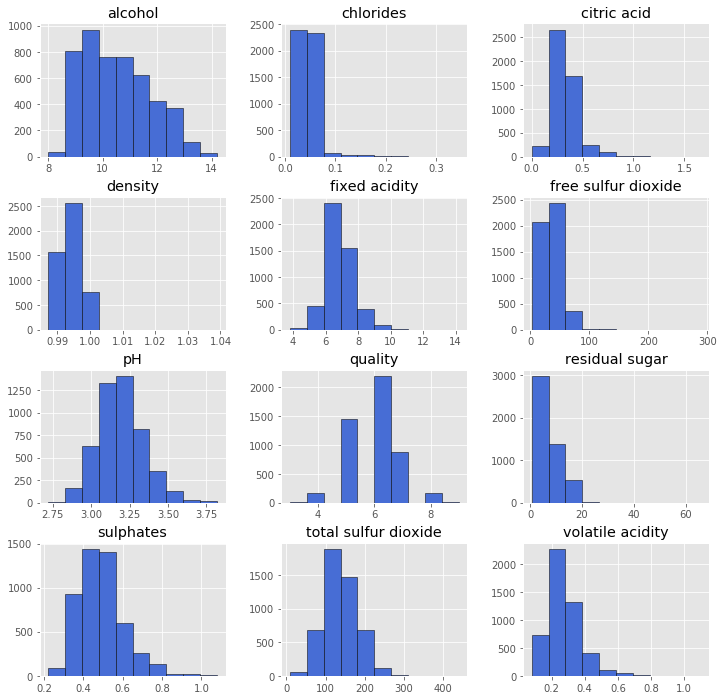

In [7]:
#Frequency
plt.style.use("ggplot")  
data.hist(figsize=(12,12), color="#476DD5", edgecolor="k")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


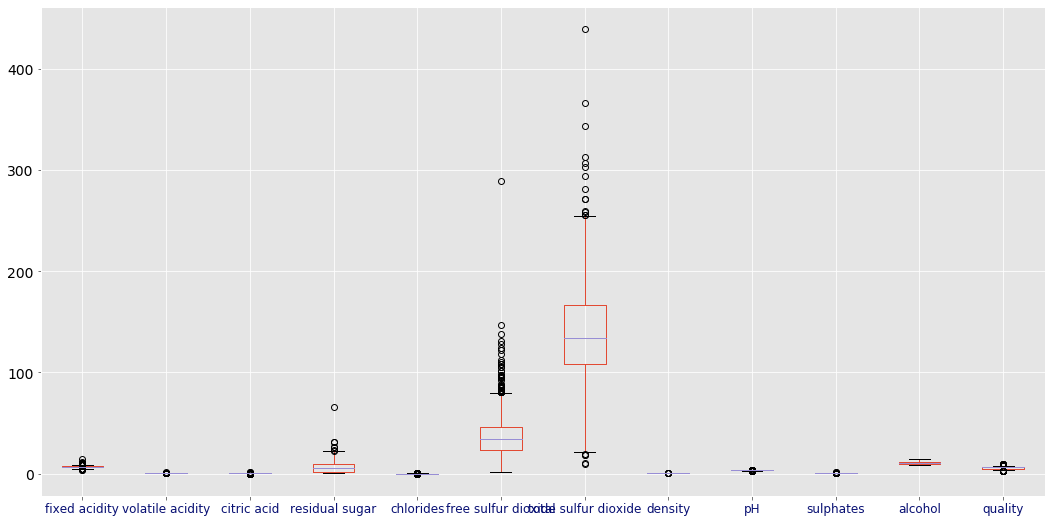

In [8]:
data.boxplot(figsize=(18,9))
plt.yticks(fontsize=14,color="k")
plt.xticks(fontsize=12,color="#081073")

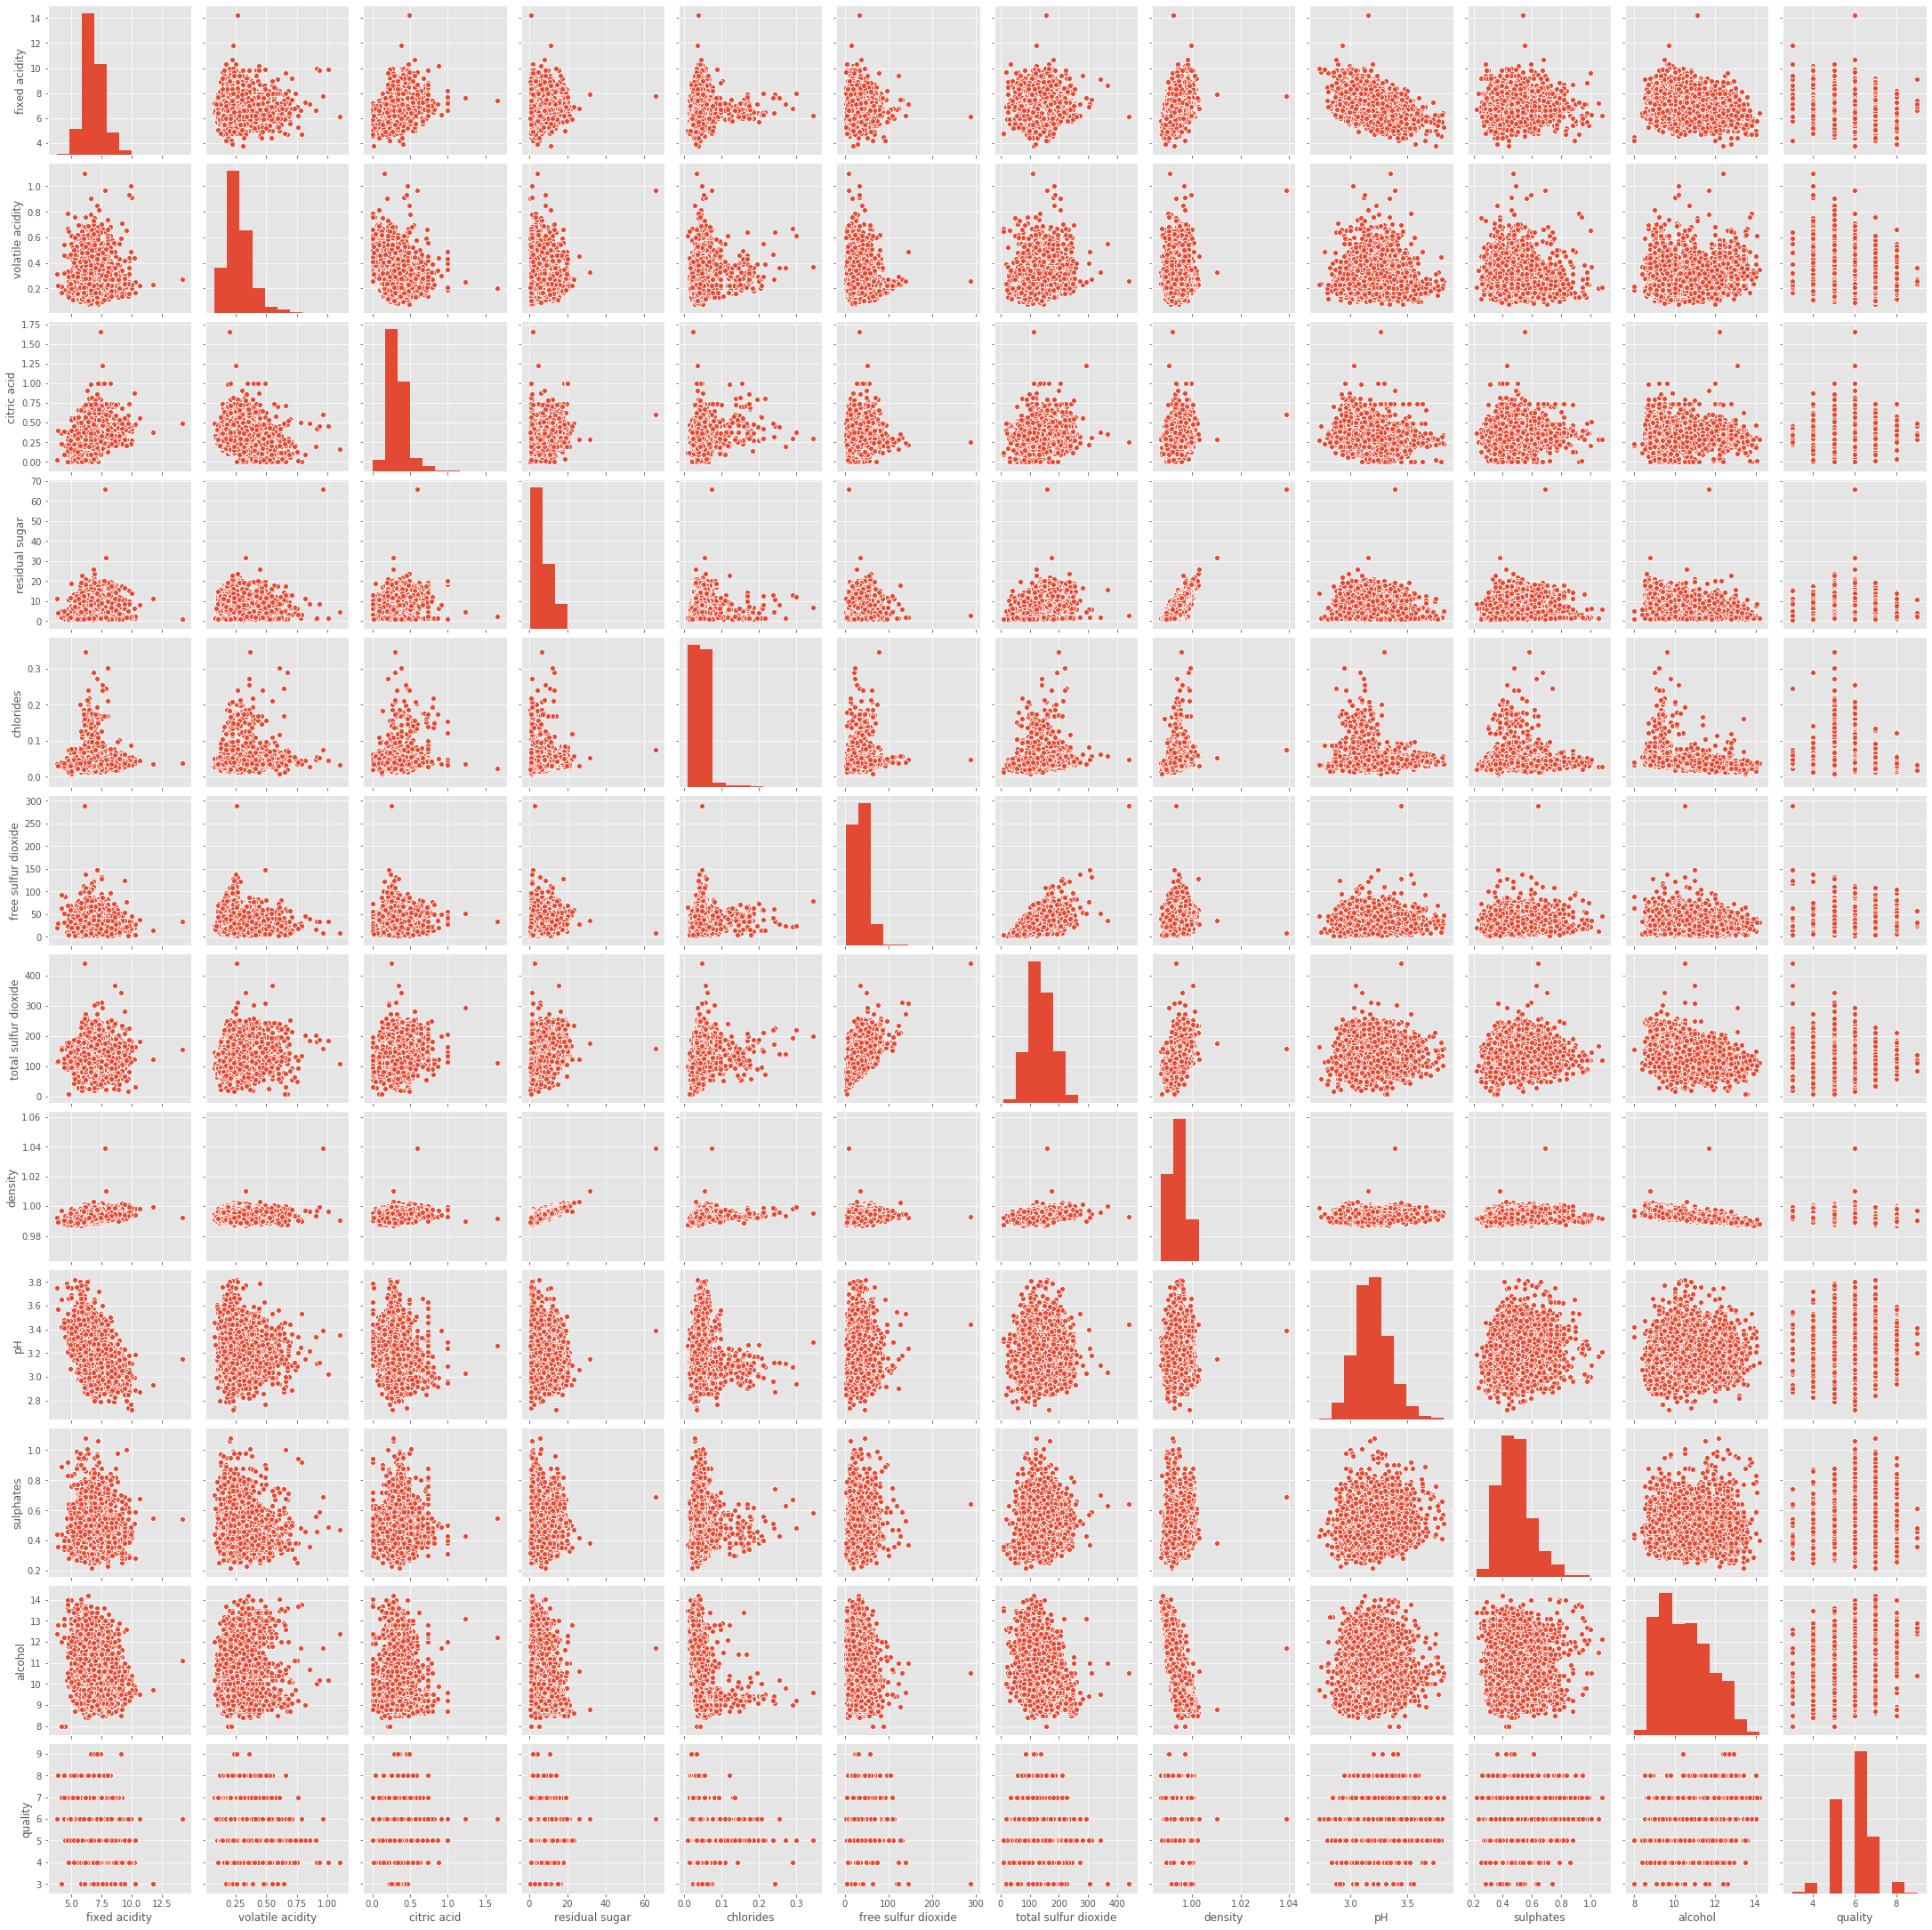

In [9]:
#每个变量之间的关系
sns.pairplot(data)

In [10]:
#是否为正态分布 左偏/右偏
data.skew().sort_values(ascending=False)

chlorides               5.023331
volatile acidity        1.576980
free sulfur dioxide     1.406745
citric acid             1.281920
residual sugar          1.077094
density                 0.977773
sulphates               0.977194
fixed acidity           0.647751
alcohol                 0.487342
pH                      0.457783
total sulfur dioxide    0.390710
quality                 0.155796
dtype: float64

In [11]:
data.kurt().sort_values(ascending=False)

chlorides               37.564600
free sulfur dioxide     11.466342
density                  9.793807
citric acid              6.174901
volatile acidity         5.091626
residual sugar           3.469820
fixed acidity            2.172178
sulphates                1.590930
total sulfur dioxide     0.571853
pH                       0.530775
quality                  0.216526
alcohol                 -0.698425
dtype: float64

In [12]:
#每个特征极差
(data.max()-data.min()).sort_values(ascending=False)

total sulfur dioxide    431.00000
free sulfur dioxide     287.00000
residual sugar           65.20000
fixed acidity            10.40000
alcohol                   6.20000
quality                   6.00000
citric acid               1.66000
pH                        1.10000
volatile acidity          1.02000
sulphates                 0.86000
chlorides                 0.33700
density                   0.05187
dtype: float64

In [ ]:
#从均值、标准差、四分位数等值，及直方图看到：
##（1）所有的特征都不是正态分布，均呈现右偏。chlorides（氯化物）的右偏程度最大，为5.02，接着是volatile acidity（挥发性酸）：1.58 、free sulfur dioxide（游离二氧化硫）：1.41；右偏最小的三个特征为：total sulfur dioxide（总二氧化硫0.39）< PH（酸碱度0.46）< alcohol（酒精0.49）。
##（2）每个特征的极差（最大值减去最小值的值）相差较大，最大的为total sulfur dioxide（总二氧化硫）：431，最小的为density（密度），仅为0.05。后面将对数据进行归一化处理，消除量纲影响。
##（3）从四分位数来看，可能存在异常值。从箱线图来看，存在较多的较大的值。为了便于观察，下面进行归一化，借用箱线图更细致来看数据的集中分布情况、异常值的情况。
##（4）质量评分最小值为3，最大值为9。50%的评分为5或6分，看出大多数白葡萄酒质量处于中等水平，不会太差，也不会太好。
##（5）看到大多数变量之间的关系较小，下面通过具体的数值及热力图做更深入探讨。

In [13]:
#下面对数据进行标准化处理，让数据减去其均值再除以其对应的标准差
from sklearn.preprocessing import scale
data_scaled = scale(data)
data_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

In [ ]:
plt.figure(figsize=(17,8))
columns = ["非挥发性酸","挥发性酸","柠檬酸","剩余糖分","氯化物","游离二氧化硫","总二氧化硫",
            "密度","酸碱性","硫酸盐","酒精","质量"]
plt.boxplot(data_scaled,
            showmeans=True,meanprops={"marker":"D","markerfacecolor":"red"},#设置均值点的属性，点的形状、填充色 
            labels=columns
            )
plt.title("归一化后数据的箱线图",color="#4013AF",size=18)
plt.yticks(fontsize=14,color="k")
plt.xticks(fontsize=14.5,color="#081073")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fd2ea90>,
      dtype=object)

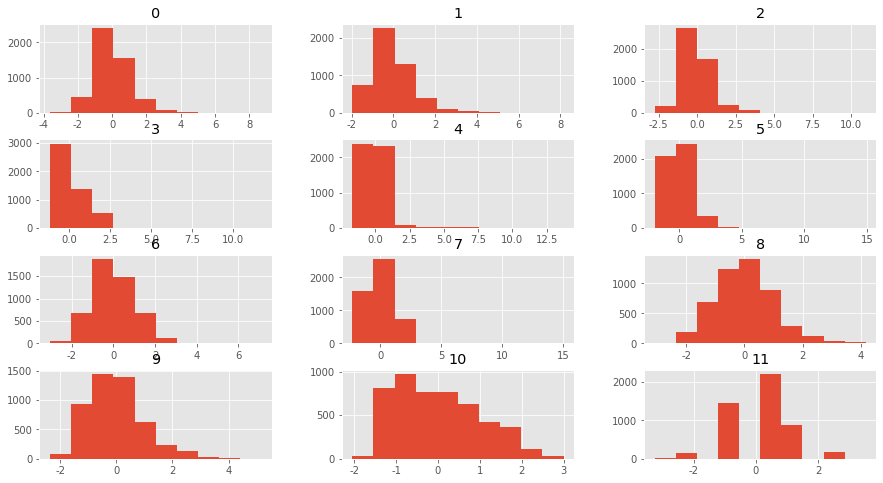

In [16]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.hist(figsize=(15,8))

In [17]:
data_scaled.skew().sort_values(ascending=False)

4     5.023331
1     1.576980
5     1.406745
2     1.281920
3     1.077094
7     0.977773
9     0.977194
0     0.647751
10    0.487342
8     0.457783
6     0.390710
11    0.155796
dtype: float64

In [18]:
data_scaled.kurt().sort_values(ascending=False)

4     37.564600
5     11.466342
7      9.793807
2      6.174901
1      5.091626
3      3.469820
0      2.172178
9      1.590930
6      0.571853
8      0.530775
11     0.216526
10    -0.698425
dtype: float64

In [19]:
data_scaled.kurt().sort_values(ascending=False)

4     37.564600
5     11.466342
7      9.793807
2      6.174901
1      5.091626
3      3.469820
0      2.172178
9      1.590930
6      0.571853
8      0.530775
11     0.216526
10    -0.698425
dtype: float64

In [ ]:
#对数据进行归一化后
##（1）其中，氯化物的箱体最扁，说明50%的数据在均值附近波动，但是存在大量较大的异常值，偏离均值分布。
##（2）而剩余糖分、总二氧化硫、密度、质量评分的异常值相对其他特征来说，比较少，且普遍远大于平均值。
##（3）非挥发性酸、柠檬酸、酸碱性这三个特征都存在大量较大的异常值，但也同时存在部分较小的异常值。
##（4）挥发性酸、氯化物、游离二氧化硫、硫酸盐这四个特征的异常值普遍较大，只有氯化物存在少量较小的异常值。
##（5）酒精特征不存在异常值，也与归一前所做的直方图对应得上。
##（6）归一化后数据的偏度、峰度均没有改变，但是它将数据按照一定的规则缩小了，使得采用MSE来评价更有参考意义。

In [37]:
#下面探究一下，各特征间、各特征与质量评分之间的关系：
data_df_scaled = pd.DataFrame(data_scaled)
data_df_scaled.columns = columns
data_df_scaled.sample(4)  #随机抽取5个归一化后的样本数据

非挥发性酸      挥发性酸       柠檬酸      剩余糖分       氯化物    游离二氧化硫     总二氧化硫  \
2095  1.831293  0.017452  0.543838  0.494640  0.101972 -0.135727  0.179776   
2960  1.001695 -1.669319  0.048001  1.510110 -0.264233  0.334712 -0.573277   
2667 -0.301959 -1.570098 -0.695755 -0.984201 -0.310008 -0.841385 -0.173218   
1685  0.409125 -0.280214 -0.447836  1.579123  0.422400  1.157980  1.568216   

            密度       酸碱性       硫酸盐        酒精        质量  
2095  1.595874  1.402345 -0.261553 -0.986812 -0.991374  
2960  0.773297 -0.783300  0.877657  0.394746  1.267114  
2667 -0.965483  0.077712 -0.349184  0.557282  1.267114  
1685  1.528998 -0.452141 -0.962605 -1.230616  1.267114

In [ ]:
#plt打不出汉字解决办法：
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [38]:
corr_df = data_df_scaled.corr()
corr_df

非挥发性酸      挥发性酸       柠檬酸      剩余糖分       氯化物    游离二氧化硫     总二氧化硫  \
非挥发性酸   1.000000 -0.022697  0.289181  0.089021  0.023086 -0.049396  0.091070   
挥发性酸   -0.022697  1.000000 -0.149472  0.064286  0.070512 -0.097012  0.089261   
柠檬酸     0.289181 -0.149472  1.000000  0.094212  0.114364  0.094077  0.121131   
剩余糖分    0.089021  0.064286  0.094212  1.000000  0.088685  0.299098  0.401439   
氯化物     0.023086  0.070512  0.114364  0.088685  1.000000  0.101392  0.198910   
游离二氧化硫 -0.049396 -0.097012  0.094077  0.299098  0.101392  1.000000  0.615501   
总二氧化硫   0.091070  0.089261  0.121131  0.401439  0.198910  0.615501  1.000000   
密度      0.265331  0.027114  0.149503  0.838966  0.257211  0.294210  0.529881   
酸碱性    -0.425858 -0.031915 -0.163748 -0.194133 -0.090439 -0.000618  0.002321   
硫酸盐    -0.017143 -0.035728  0.062331 -0.026664  0.016763  0.059217  0.134562   
酒精     -0.120881  0.067718 -0.075729 -0.450631 -0.360189 -0.250104 -0.448892   
质量     -0.113663 -0.194723 -0.009209 -0.097577 -0.209934  0.008158 -0.174737   

              密度       酸碱性       硫酸盐        酒精        质量  
非挥发性酸   0.265331 -0.425858 -0.017143 -0.120881 -0.113663  
挥发性酸    0.027114 -0.031915 -0.035728  0.067718 -0.194723  
柠檬酸     0.149503 -0.163748  0.062331 -0.075729 -0.009209  
剩余糖分    0.838966 -0.194133 -0.026664 -0.450631 -0.097577  
氯化物     0.257211 -0.090439  0.016763 -0.360189 -0.209934  
游离二氧化硫  0.294210 -0.000618  0.059217 -0.250104  0.008158  
总二氧化硫   0.529881  0.002321  0.134562 -0.448892 -0.174737  
密度      1.000000 -0.093591  0.074493 -0.780138 -0.307123  
酸碱性    -0.093591  1.000000  0.155951  0.121432  0.099427  
硫酸盐     0.074493  0.155951  1.000000 -0.017433  0.053678  
酒精     -0.780138  0.121432 -0.017433  1.000000  0.435575  
质量     -0.307123  0.099427  0.053678  0.435575  1.000000

In [39]:
corr_df["质量"].sort_values(ascending=False)

质量        1.000000
酒精        0.435575
酸碱性       0.099427
硫酸盐       0.053678
游离二氧化硫    0.008158
柠檬酸      -0.009209
剩余糖分     -0.097577
非挥发性酸    -0.113663
总二氧化硫    -0.174737
挥发性酸     -0.194723
氯化物      -0.209934
密度       -0.307123
Name: 质量, dtype: float64

Text(0.5, 1, '各特征间的热力图')

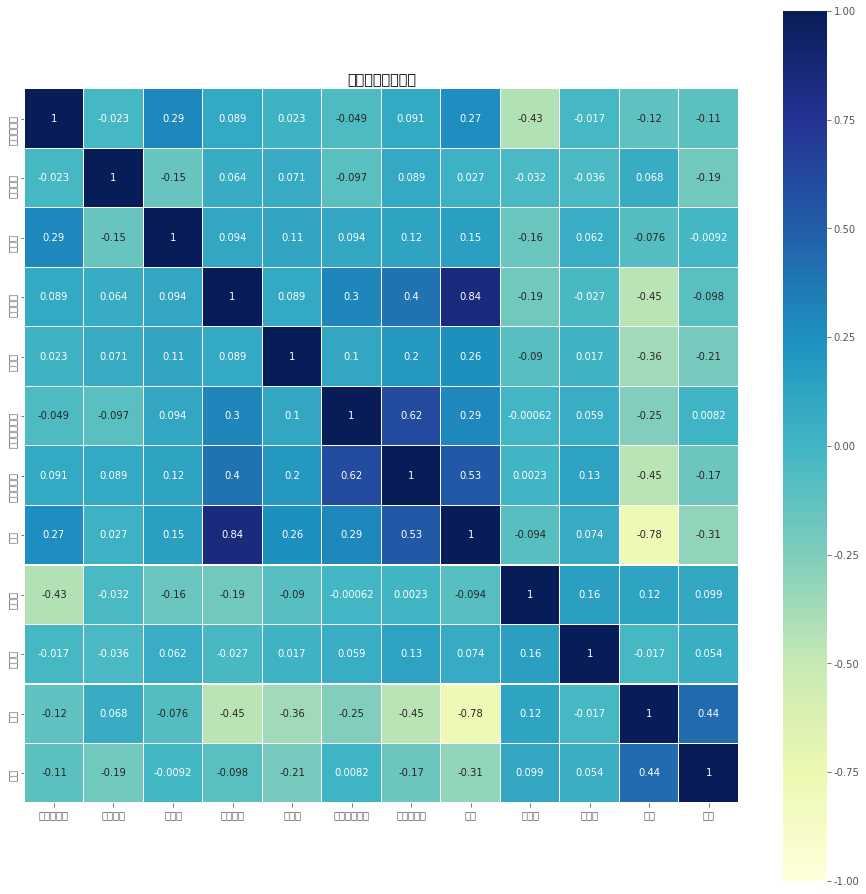

In [40]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_df,linewidths=0.1,square=True,linecolor="white",annot=True,cmap='YlGnBu',vmin=-1,vmax=1)
plt.title("各特征间的热力图")

In [ ]:
# (1）白葡萄酒的质量评分与酒精、酸碱性、硫酸盐、游离二氧化硫有正的线性相关关系，它们的含量越高，口感评分越高；而与其他特征都呈现负的线性相关关系，这些特征的含量越高，口感评分越低。关系强度最大为0.44，大部分关系强度的绝对值均小于0.2（线性关系强度在[0,1]之间）。
#（2）白葡萄酒的质量评分跟酒精、密度、氯化物的线性关系较强。质量评分与酒精之间有正相关关系，关系强度为0.44，酒精含量越高，口感评分越高；而与密度、氯化物为负线性相关关系，分别为-0.31、-0.21，它们的含量越高，白葡萄酒的口感评分越低。
#（3）从热力图看，颜色普遍较浅，说明各变量间的线性相关关系较弱。
#（4）而密度跟剩余糖分、酒精线性相关关系比较强。密度与剩余糖分的线性关系为0.84，剩余糖分越多，白葡萄酒的密度越大；密度与酒精的线性关系为-0.78，酒精密度越大，白葡萄酒的密度越小。

In [45]:
#建模分析
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
x = data[['alcohol', 'density', 'chlorides',]]
y = data['quality']
#将我们的数据集分为训练数据和测试数据
##scikit-learn 可以很容易地将我们的数据集分为训练数据和测试数据。为此，我们需要 train_test_split 从中的 model_selection 模块导入函数 scikit-learn。
from sklearn.model_selection import train_test_split
#如果我们想让测试数据占整个数据集的30%，可以使用以下代码：
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
#从scikit learn导入LinearRegression估计器
from sklearn.linear_model import LinearRegression
#创建一个线性回归Python对象的实例。我们将把它赋给一个名为model的变量
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

[ 0.33830356 18.01234221 -2.55360525]


In [47]:
#查看回归方程的截距：
print(model.intercept_)

-15.466055381640743


In [48]:
#查看系数的更好方法是将它们放在一个数据帧中
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
#某个特定变量上的大系数意味着该变量对试图预测的变量的值有很大的影响。同样，小值的影响也很小

Coeff
alcohol     0.338304
density    18.012342
chlorides  -2.553605

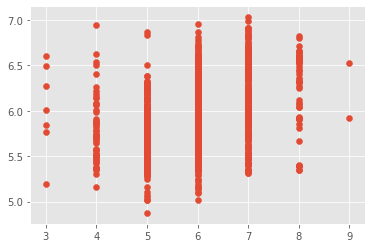

In [49]:
#根据我们的模型做出预测
##scikit-learn使得从机器学习模型做出预测变得非常容易，只需调用前面创建的模型变量的 predict 方法
### predict 变量是用来进行预测的，所以它只接受一个 x-array 参数，它将为我们生成y值
predictions = model.predict(x_test)
#预测变量保存 x_test 中存储的要素的预测值。 由于我们使用 train_test_split 方法将实际值存储在y_test中，因此我们接下来要做的是将预测数组的值与 y_test 的值进行比较。
##这里有一种简单的方法是使用散点图绘制两个数组。 使用 plt.scatter 方法可以轻松构建 matplotlib 散点图。
plt.scatter(y_test, predictions)

In [52]:
#套索模型（LassoCV）
##部分数据做交叉验证
from sklearn.linear_model import LassoCV
L1_CV = LassoCV(cv=10).fit(x_train, y_train)
yy1_pred = L1_CV.predict(x_test)
print("均方误差：",mean_squared_error(y_test,predictions))

均方误差： 0.661202217593809


In [53]:
Coef1_df = pd.DataFrame(L1_CV.intercept_,index=columns[0:11],columns=["回归系数"])
Coef1_df.sort_values(by="回归系数",ascending=False)

回归系数
非挥发性酸   2.674398
挥发性酸    2.674398
柠檬酸     2.674398
剩余糖分    2.674398
氯化物     2.674398
游离二氧化硫  2.674398
总二氧化硫   2.674398
密度      2.674398
酸碱性     2.674398
硫酸盐     2.674398
酒精      2.674398

In [ ]:
#回归系数有点问题